# From Chapter 9: Classification and Regression Trees - Modified Version 
# Acceptance of Personal Loan

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> Code included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.

Universal Bank is a relatively young bank that is growing rapidly in terms of overall customer acquisition. The majority of these customers are liability customers with varying sizes of relationship with the bank. The customer base of asset customers is quite small, and the bank is interested in growing this base rapidly to bring in more loan business. In particular, it wants to explore ways of converting its liability (deposit) customers to personal loan customers.

A campaign the bank ran for liability customers showed a healthy conversion rate of over 9% successes. This has encouraged the retail marketing department to devise smarter campaigns with better target marketing. The goal of our analysis is to model the previous campaign’s customer behavior to analyze what combination of factors make a customer more likely to accept a personal loan. This will serve as the basis for the design of a new campaign. Our predictive model will be a classification tree.

The bank’s dataset includes data on 5000 customers. The data include customer demographic information (age, income, etc.), customer response to the last personal loan campaign (Personal Loan), and the customer’s relationship with the bank (mortgage, securities account, etc.). Among these 5000 customers, only 480 (=9.6%) accepted the personal loan that was offered to them in the earlier campaign.


## Import required packages

In [2]:
%matplotlib inline
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from sklearn.tree import plot_tree

In [3]:
bank_df = pd.read_csv('sample_data/UniversalBank.csv')
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
bank_df = bank_df.drop(columns=['ID', 'ZIP Code'])
X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']
X

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

### A full tree for the loan acceptance data using the training set (3000 records)

[Text(0.5346385542168675, 0.9545454545454546, 'Income <= 110.5\ngini = 0.173\nsamples = 3000\nvalue = [2713, 287]\nclass = No'),
 Text(0.2560240963855422, 0.8636363636363636, 'CCAvg <= 2.95\ngini = 0.031\nsamples = 2363\nvalue = [2326, 37]\nclass = No'),
 Text(0.04819277108433735, 0.7727272727272727, 'Income <= 106.5\ngini = 0.002\nsamples = 2204\nvalue = [2202, 2]\nclass = No'),
 Text(0.024096385542168676, 0.6818181818181818, 'gini = 0.0\nsamples = 2188\nvalue = [2188, 0]\nclass = No'),
 Text(0.07228915662650602, 0.6818181818181818, 'Family <= 3.5\ngini = 0.219\nsamples = 16\nvalue = [14, 2]\nclass = No'),
 Text(0.04819277108433735, 0.5909090909090909, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]\nclass = No'),
 Text(0.0963855421686747, 0.5909090909090909, 'Age <= 38.0\ngini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = No'),
 Text(0.07228915662650602, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = No'),
 Text(0.12048192771084337, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\ncla

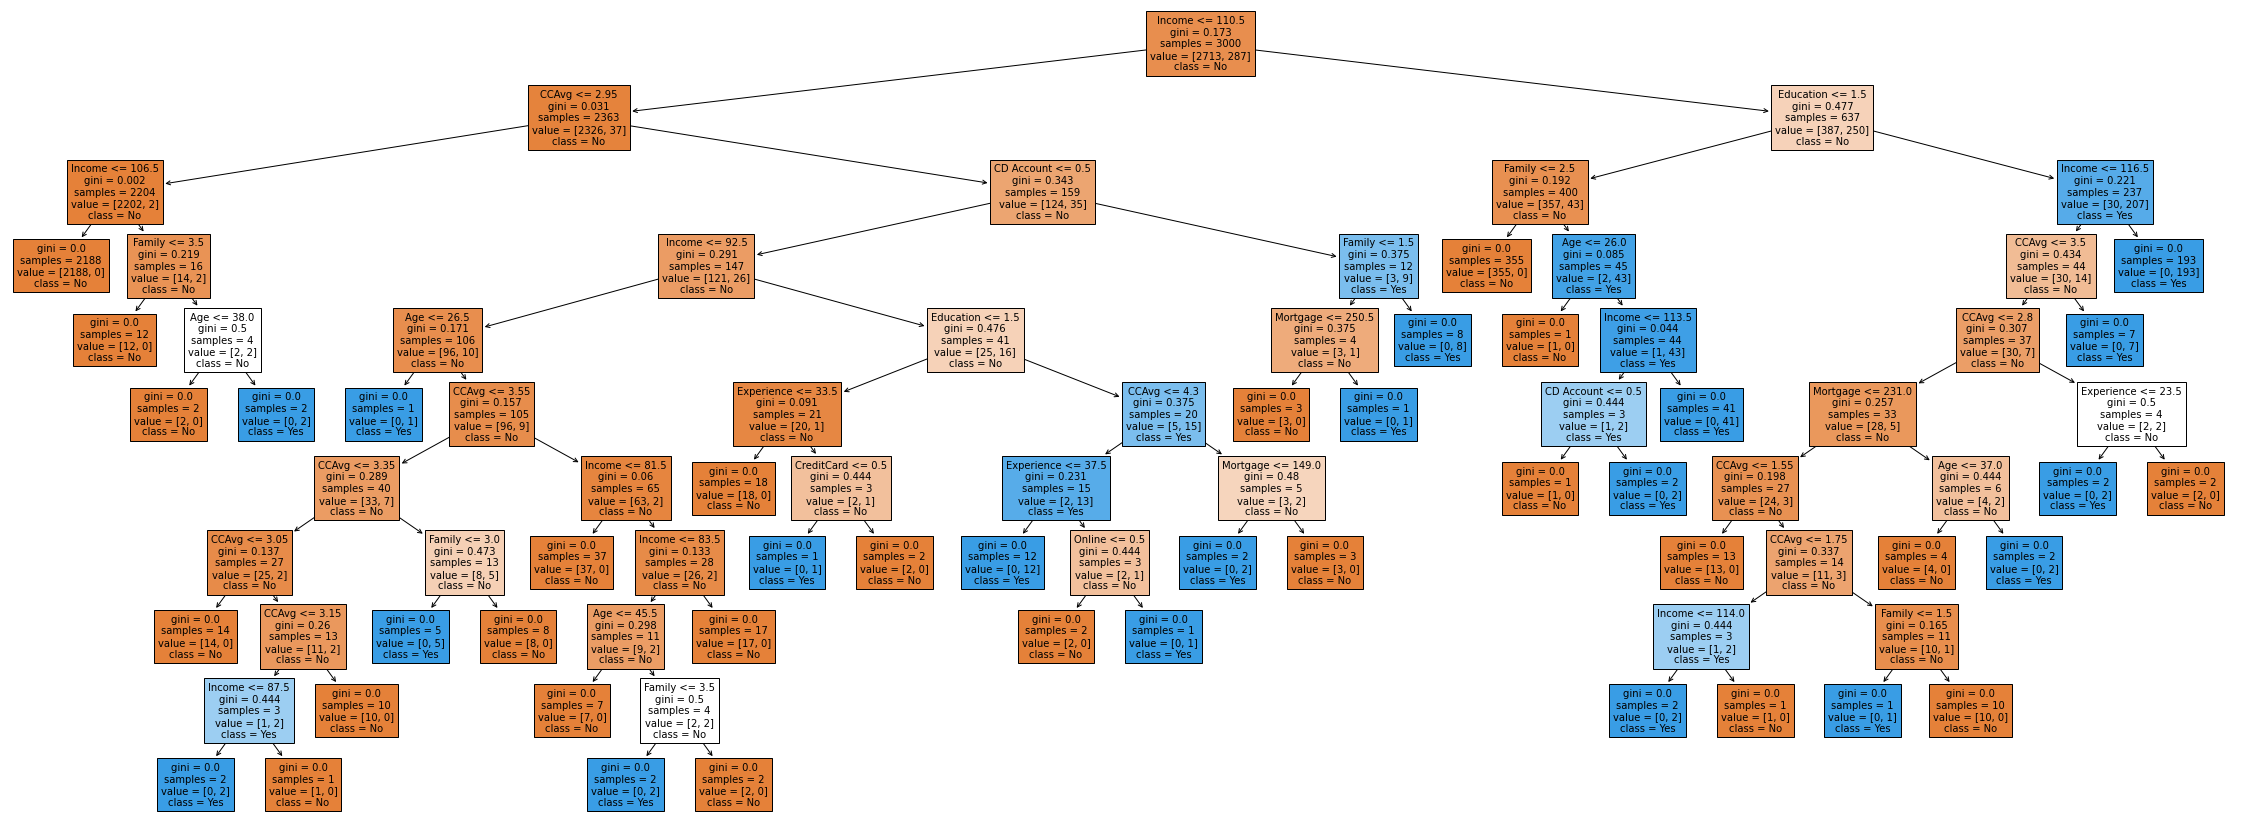

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

fullClassTree = DecisionTreeClassifier(random_state=1)
fullClassTree.fit(X_train, y_train)

plt.figure(figsize=(40,15))
plot_tree(fullClassTree, feature_names=X_train.columns,filled=True, class_names=['No','Yes'], fontsize=10)

### Confusion matrices and accuracy for the default (full) classification tree on the training set of the personal loan data

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred=fullClassTree.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
cm

array([[2713,    0],
       [   0,  287]])

In [7]:
accuracy = accuracy_score(y_train, y_pred)*100
print('Accuracy of decision tree model on the training dataset is ' + str(round(accuracy, 2)) + ' %.')

Accuracy of decision tree model on the training dataset is 100.0 %.


### Confusion matrices and accuracy for the default (full) classification tree, on the testing set of the personal loan data

In [8]:
y_pred=fullClassTree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[1790,   17],
       [  25,  168]])

In [9]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of decision tree model on the test dataset is ' + str(round(accuracy, 2)) + ' %.')

Accuracy of decision tree model on the test dataset is 97.9 %.


### Five-fold cross-validation of the full decision tree classifier

In [10]:
treeClassifier = DecisionTreeClassifier()

scores = cross_val_score(treeClassifier, X_train, y_train, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})')

Accuracy scores of each fold:  ['0.983', '0.973', '0.993', '0.985', '0.992']
Accuracy: 0.985 (+/- 0.007)


### Smaller classification tree for the loan acceptance data using the training set (3000 records)

[Text(0.375, 0.875, 'Income <= 110.5\ngini = 0.173\nsamples = 3000\nvalue = [2713, 287]\nclass = No'),
 Text(0.25, 0.625, 'gini = 0.031\nsamples = 2363\nvalue = [2326, 37]\nclass = No'),
 Text(0.5, 0.625, 'Education <= 1.5\ngini = 0.477\nsamples = 637\nvalue = [387, 250]\nclass = No'),
 Text(0.25, 0.375, 'Family <= 2.5\ngini = 0.192\nsamples = 400\nvalue = [357, 43]\nclass = No'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 355\nvalue = [355, 0]\nclass = No'),
 Text(0.375, 0.125, 'gini = 0.085\nsamples = 45\nvalue = [2, 43]\nclass = Yes'),
 Text(0.75, 0.375, 'Income <= 116.5\ngini = 0.221\nsamples = 237\nvalue = [30, 207]\nclass = Yes'),
 Text(0.625, 0.125, 'gini = 0.434\nsamples = 44\nvalue = [30, 14]\nclass = No'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 193\nvalue = [0, 193]\nclass = Yes')]

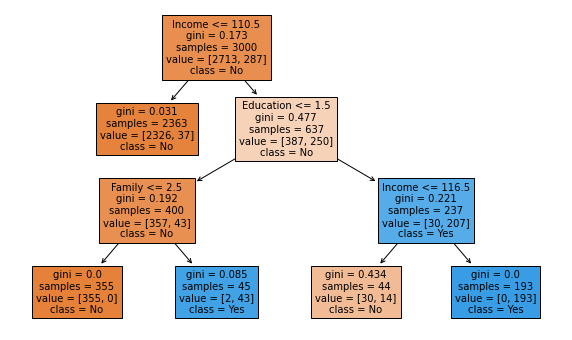

In [13]:
smallClassTree = DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_impurity_decrease=0.01)
smallClassTree.fit(X_train, y_train)
plt.figure(figsize=(10, 6))
plot_tree(smallClassTree, feature_names=X_train.columns,filled=True, class_names=['No','Yes'], fontsize=10)

### Confusion matrices and accuracy for the small classification tree on the training set of the personal loan data

In [14]:
y_pred=smallClassTree.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
cm

array([[2711,    2],
       [  51,  236]])

In [15]:
accuracy = accuracy_score(y_train, y_pred)*100
print('Accuracy of small decision tree model on the training dataset is ' + str(round(accuracy, 2)) + ' %.')

Accuracy of small decision tree model on the training dataset is 98.23 %.


### Confusion matrices and accuracy for the small classification tree, on the testing set of the personal loan data

In [16]:
y_pred=smallClassTree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[1804,    3],
       [  43,  150]])

In [17]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of decision tree model on the test dataset is ' + str(round(accuracy, 2)) + ' %.')

Accuracy of decision tree model on the test dataset is 97.7 %.


# Grid search

### Exhaustive grid search to fine tune method parameters

The exhaustive grid search can quickly become very time consuming. In our example, the first grid search assessed 4 × 5 × 5 = 100 combinations and the second 14 × 12 × 3 = 504 combinations. With even more tune-able parameters the number of possible combinations can become very large.

In [18]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.9876666666666667
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split': 20}


In [19]:
# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(2, 16)), 
    'min_samples_split': list(range(10, 22)), 
    'min_impurity_decrease': [0, 0.0001, 0.0002], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Improved score:  0.9883333333333333
Improved parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 20}


[Text(0.45, 0.9166666666666666, 'Income <= 110.5\ngini = 0.173\nsamples = 3000\nvalue = [2713, 287]\nclass = No'),
 Text(0.2, 0.75, 'CCAvg <= 2.95\ngini = 0.031\nsamples = 2363\nvalue = [2326, 37]\nclass = No'),
 Text(0.1, 0.5833333333333334, 'Income <= 106.5\ngini = 0.002\nsamples = 2204\nvalue = [2202, 2]\nclass = No'),
 Text(0.05, 0.4166666666666667, 'gini = 0.0\nsamples = 2188\nvalue = [2188, 0]\nclass = No'),
 Text(0.15, 0.4166666666666667, 'gini = 0.219\nsamples = 16\nvalue = [14, 2]\nclass = No'),
 Text(0.3, 0.5833333333333334, 'CD Account <= 0.5\ngini = 0.343\nsamples = 159\nvalue = [124, 35]\nclass = No'),
 Text(0.25, 0.4166666666666667, 'Income <= 92.5\ngini = 0.291\nsamples = 147\nvalue = [121, 26]\nclass = No'),
 Text(0.15, 0.25, 'Experience <= 0.5\ngini = 0.171\nsamples = 106\nvalue = [96, 10]\nclass = No'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.2, 0.08333333333333333, 'gini = 0.157\nsamples = 105\nvalue = [96, 9]\

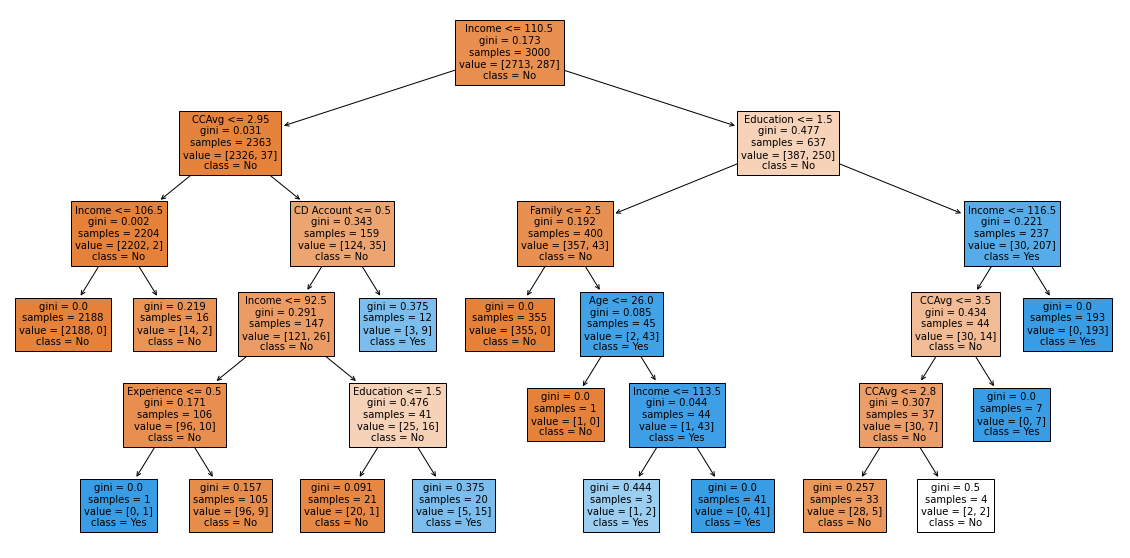

In [20]:
plt.figure(figsize=(20, 10))
plot_tree(bestClassTree, feature_names=X_train.columns, class_names=['No','Yes'], filled=True, fontsize=10)


### Evaluating Performance

In [21]:
y_pred=bestClassTree.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
cm

array([[2704,    9],
       [  19,  268]])

In [22]:
accuracy = accuracy_score(y_train, y_pred)*100
print('Accuracy of decision tree model on the training dataset is ' + str(round(accuracy, 2)) + ' %.')

Accuracy of decision tree model on the training dataset is 99.07 %.


In [23]:
y_pred=bestClassTree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[1793,   14],
       [  21,  172]])

In [24]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of decision tree model on the test dataset is ' + str(round(accuracy, 2)) + ' %.')

Accuracy of decision tree model on the test dataset is 98.25 %.
